In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools
import random

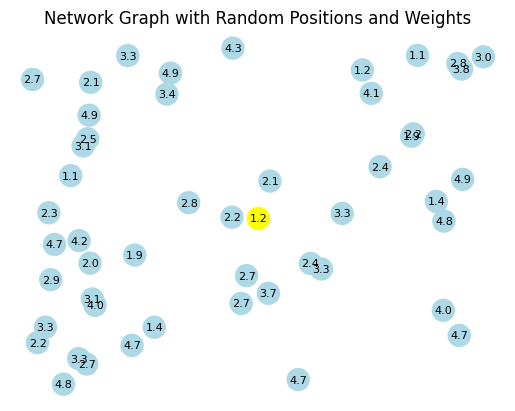

In [3]:
# Parameters
n = 50              # Number of nodes
weight_range = 5    # highest value the weight can go
pos_lim=10          # limit for the position of the nodes

# Generate graph
G = nx.Graph()

# Add nodes with random positions and weights
#np.random.seed(400)
positions = {node: (np.random.uniform(-pos_lim,pos_lim), np.random.uniform(-pos_lim,pos_lim)) for node in range(n)}
positions[0] = (0, 0)  # depot position

weights = {node: np.random.uniform(1, weight_range) for node in range(n)}
G.add_nodes_from(positions.keys())
nx.set_node_attributes(G, positions, 'pos')
nx.set_node_attributes(G, weights, 'weight')

# Drawing the graph
weights = nx.get_node_attributes(G, 'weight')
weight_labels = {node: round(weight, 1) for node, weight in weights.items()}
node_colors = ['yellow' if node == 0 else 'lightblue' for node in G.nodes()]
nx.draw_networkx(G, positions, with_labels=True, labels = weight_labels, node_color=node_colors, node_size=250, font_size=8)
plt.title('Network Graph with Random Positions and Weights')
plt.axis('off')
plt.show()


Cluster generation

In [11]:
def CC(cluster):
    pos = nx.get_node_attributes(cluster, 'pos')
    vi_x = [pos[node][0] for node in cluster.nodes()]
    vi_y = [pos[node][1] for node in cluster.nodes()]
    n = len(vi_x)
    x = np.sum(vi_x)/n
    y = np.sum(vi_y)/n
    return x,y

positions_list = list(positions.values())
positions_list = [position for position in positions_list if position != (0, 0)]
distances_list = np.linalg.norm(positions_list, axis=1)

# find the core stop
pos_v = positions[np.argmax(distances_list)]                                #maximum distance
#pos_v = positions[max(positions, key=lambda node: weights[node])]          #maximum weight


#########################################

Cluster = nx.Graph()
Cluster.add_node(0, pos=pos_v, weight=[weights[node] for node, position in positions.items() if position == pos_v])
w = Cluster.nodes[0]['weight'][0]
C=10
i=0

while w < C:
    i += 1
    centroid = CC(Cluster)
    distances_new = np.linalg.norm(np.subtract(positions_list, list(centroid)), axis=1)
    min_new = np.partition(distances_new, i)[i]
    min_new_index = np.where(distances_new == min_new)[0][0]
    min_new_position = positions_list[min_new_index]
    Cluster.add_node(i, pos=min_new_position, weight=[weights[node] for node, position in positions.items() if position == min_new_position])
    w += Cluster.nodes[i]['weight'][0]
Cluster.remove_node(max(Cluster.nodes()))
    
    

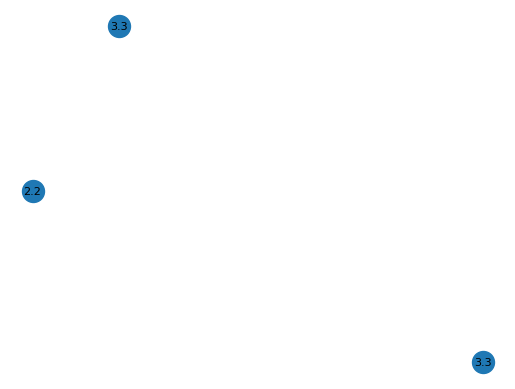

8.8


In [12]:
weight_labels = nx.get_node_attributes(Cluster, 'weight')
weight_labels = {node: weight_labels[0] for node, weight_labels in weight_labels.items()}
weight_labels = {node: round(weight_labels, 1) for node, weight_labels in weight_labels.items()}

Cluster_pos = nx.get_node_attributes(Cluster, 'pos')
nx.draw_networkx(Cluster, Cluster_pos, with_labels=True, labels = weight_labels, node_size=250, font_size=8)
plt.axis('off')
plt.show()

weight_labels_sum = sum(weight_labels.values())
print(weight_labels_sum)

In [6]:
C=10
Cluster_list=[]
discard_pos=[]
positions_list = list(positions.values())

while len(positions_list) > 0:
    positions_list = [position for position in positions_list if position not in discard_pos]
    distances_list = np.linalg.norm(positions_list, axis=1)

    # find the core stop
    pos_v = positions[np.argmax(distances_list)]                                #maximum distance
    #pos_v = positions[max(positions, key=lambda node: weights[node])]          #maximum weight

    Cluster = nx.Graph()
    Cluster.add_node(0, pos=pos_v, weight=[weights[node] for node, position in positions.items() if position == pos_v])
    w = Cluster.nodes[0]['weight'][0]
    i=0
    
    while w < C:
        i += 1
        centroid = CC(Cluster)
        distances_new = np.linalg.norm(np.subtract(positions_list, list(centroid)), axis=1)
        min_new = np.partition(distances_new, i)[i]
        min_new_index = np.where(distances_new == min_new)[0][0]
        min_new_position = positions_list[min_new_index]
        Cluster.add_node(i, pos=min_new_position, weight=[weights[node] for node, position in positions.items() if position == min_new_position])
        w += Cluster.nodes[i]['weight'][0]

    Cluster.remove_node(max(Cluster.nodes()))
    discard_pos = list(nx.get_node_attributes(Cluster, 'pos').values())
    Cluster_list.append(Cluster)
    
    



ValueError: kth(=2) out of bounds (2)